# Statistics Final project

Today we are going to use a machine learning technique (ML) called **random forest** to classify content on a given dataset, this technique involves statistical tools such as random sampling and the law of large numbers.<br>
But first we are going to clean our datatset and then make a statistical analysis of our dataset to ensre it doesnt contained irrelevant data.

## Clean the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/titanic.csv')
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print(f"Percentage of survivors: {df['Survived'].mean() * 100:.2f}%")

Percentage of survivors: 38.38%


In [5]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [6]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
df["Pclass"].unique()

array([3, 1, 2])

In [8]:
# the issue with 1 2 3 values is that some models can missinterpret them as one being more important than the other. To avoid this we can use  0 or 1 values (Not likely due to happen with random forest though since we use a threshold to split the data but it can help improve the number of features)
df["1st_class"] = df.Pclass.apply(lambda x: 1 if x == 1 else 0)
df["2nd_class"] = df.Pclass.apply(lambda x: 1 if x == 2 else 0)
df["3rd_class"] = df.Pclass.apply(lambda x: 1 if x == 3 else 0)
df["Sex"] = df.Sex.apply(lambda x: 1 if x == 'male' else 0)
df.drop(['Pclass'], axis=1, inplace=True)
df.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,1st_class,2nd_class,3rd_class
0,1,0,1,22.0,1,0,7.2500,S,0,0,1
1,2,1,0,38.0,1,0,71.2833,C,1,0,0
2,3,1,0,26.0,0,0,7.9250,S,0,0,1
3,4,1,0,35.0,1,0,53.1000,S,1,0,0
4,5,0,1,35.0,0,0,8.0500,S,0,0,1


In [9]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df["Embarked_S"] = df.Embarked.apply(lambda x: 1 if x == 'S' else 0)
df["Embarked_C"] = df.Embarked.apply(lambda x: 1 if x == 'C' else 0)
df["Embarked_Q"] = df.Embarked.apply(lambda x: 1 if x == 'Q' else 0)
df.drop(['Embarked'], axis=1, inplace=True)
df.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,1st_class,2nd_class,3rd_class,Embarked_S,Embarked_C,Embarked_Q
0,1,0,1,22.0,1,0,7.2500,0,0,1,1,0,0
1,2,1,0,38.0,1,0,71.2833,1,0,0,0,1,0
2,3,1,0,26.0,0,0,7.9250,0,0,1,1,0,0
3,4,1,0,35.0,1,0,53.1000,1,0,0,1,0,0
4,5,0,1,35.0,0,0,8.0500,0,0,1,1,0,0


In [11]:
# change Age columns to integer values
df['Age'] = df['Age'].fillna(0).astype(int)
df.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,1st_class,2nd_class,3rd_class,Embarked_S,Embarked_C,Embarked_Q
0,1,0,1,22,1,0,7.2500,0,0,1,1,0,0
1,2,1,0,38,1,0,71.2833,1,0,0,0,1,0
2,3,1,0,26,0,0,7.9250,0,0,1,1,0,0
3,4,1,0,35,1,0,53.1000,1,0,0,1,0,0
4,5,0,1,35,0,0,8.0500,0,0,1,1,0,0


In [12]:
df.to_csv('data/titanic_cleaned.csv', index=False)

## Statistical Analysis
Now that we have a clean dataset, we can analyse values and plot them.

In [13]:
df = pd.read_csv('data/titanic_cleaned.csv')
df.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,1st_class,2nd_class,3rd_class,Embarked_S,Embarked_C,Embarked_Q
0,1,0,1,22,1,0,7.2500,0,0,1,1,0,0
1,2,1,0,38,1,0,71.2833,1,0,0,0,1,0
2,3,1,0,26,0,0,7.9250,0,0,1,1,0,0
3,4,1,0,35,1,0,53.1000,1,0,0,1,0,0
4,5,0,1,35,0,0,8.0500,0,0,1,1,0,0


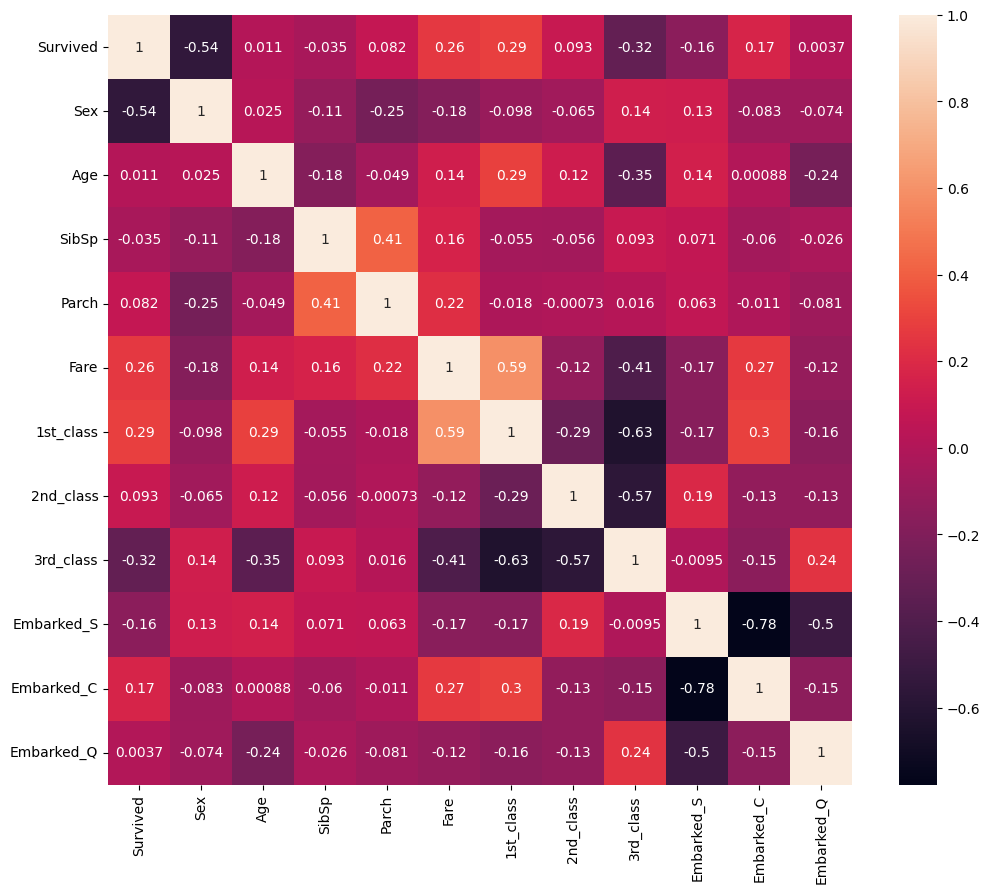

In [14]:
# Plot the correlation matrix of the data excluding the PassengerId column
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(['PassengerId'], axis=1).corr(), annot=True)
plt.show()

It seems that:
   - There is a important negative correlation between sex and survivors, likely due to the fact that they are both 0 1 features.
   - It seems that the correlaton between the 3 classes is quite important as well as the 3 types of _Embarked_ Which is also explainable.
   - Maibe can we either delete one of the 3 columns since if it is none of the other the person is automatically part of the 3rd. Or we can come back to a format with 1 2 3 values since we are going to examine the dataset using random forest.

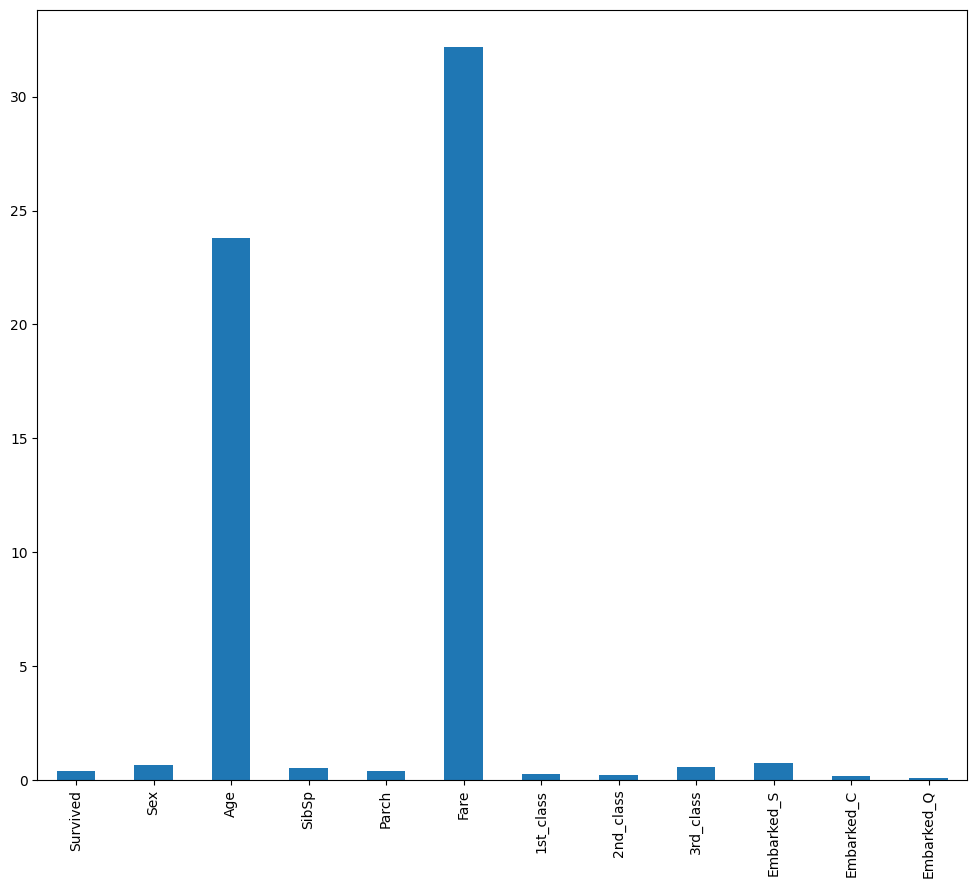

In [15]:
# Plot the mean of each columns except passengerId
plt.figure(figsize=(12, 10))
df.drop(['PassengerId'], axis=1).mean().plot(kind='bar')
plt.show()

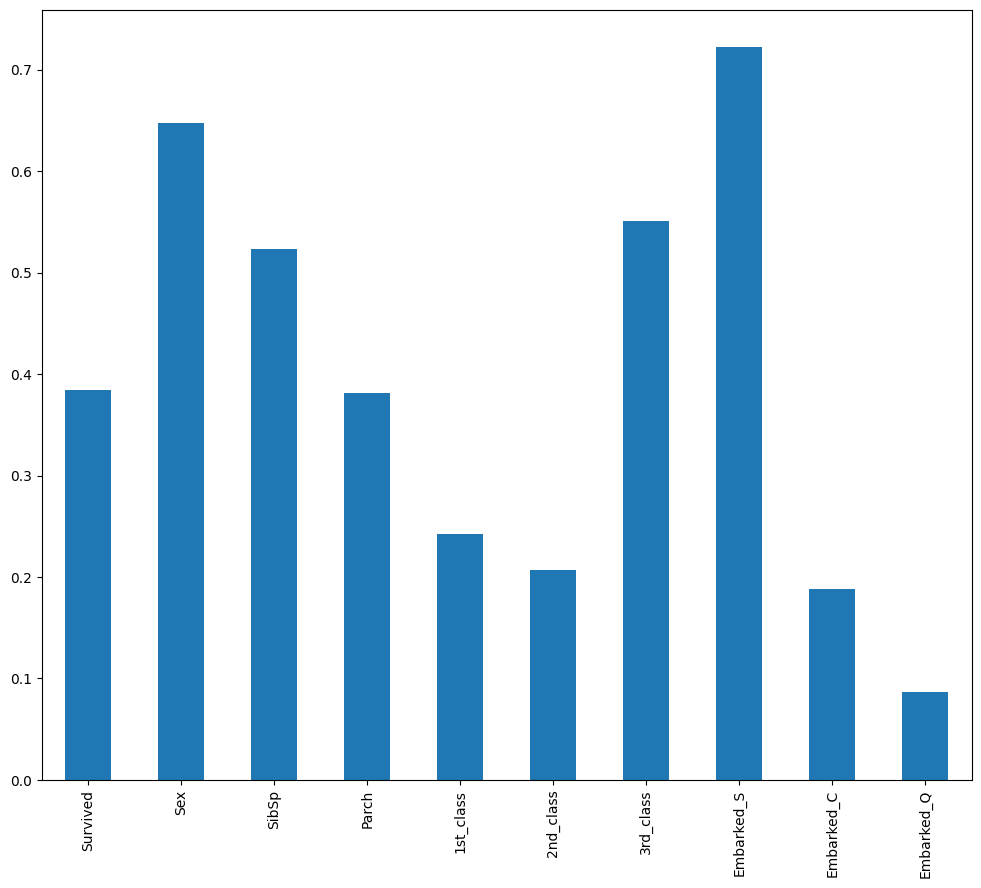

In [16]:
# Plot the mean of each columns except passengerId
plt.figure(figsize=(12, 10))
df.drop(['PassengerId', "Age", "Fare"], axis=1).mean().plot(kind='bar')
plt.show()

Here every data without a mean of 0.5 is not equilibrate. For example there are a lot more 3rd class passenger and tehre are a lot more men than women. Which also explains some correlations.

Let's concatenate some rows and normalize our data so one has no more importance than the others

In [17]:
# concatenate the clases column to have class 1 2 3 in one column
# 1 if df['1st_class'], 2 if df['2nd_class'], 3 if df['3rd']
df['class'] = df['1st_class'] + df['2nd_class'] * 2 + df['3rd_class'] * 3
df.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,1st_class,2nd_class,3rd_class,Embarked_S,Embarked_C,Embarked_Q,class
0,1,0,1,22,1,0,7.2500,0,0,1,1,0,0,3
1,2,1,0,38,1,0,71.2833,1,0,0,0,1,0,1
2,3,1,0,26,0,0,7.9250,0,0,1,1,0,0,3
3,4,1,0,35,1,0,53.1000,1,0,0,1,0,0,1
4,5,0,1,35,0,0,8.0500,0,0,1,1,0,0,3


In [18]:
df.drop(['1st_class', '2nd_class', '3rd_class'], axis=1, inplace=True)
df.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,class
0,1,0,1,22,1,0,7.2500,1,0,0,3
1,2,1,0,38,1,0,71.2833,0,1,0,1
2,3,1,0,26,0,0,7.9250,1,0,0,3
3,4,1,0,35,1,0,53.1000,1,0,0,1
4,5,0,1,35,0,0,8.0500,1,0,0,3


In [19]:
df["Embarked"] = df["Embarked_S"] + df["Embarked_C"] * 2 + df["Embarked_Q"] * 3
df.drop(['Embarked_S', 'Embarked_C', 'Embarked_Q'], axis=1, inplace=True)
df.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,class,Embarked
0,1,0,1,22,1,0,7.2500,3,1
1,2,1,0,38,1,0,71.2833,1,2
2,3,1,0,26,0,0,7.9250,3,1
3,4,1,0,35,1,0,53.1000,1,1
4,5,0,1,35,0,0,8.0500,3,1


In [20]:
# Do a PCA analysis to see if we can reduce the number of features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Explained variance: [0.26177714 0.23062184 0.16715733]
Explained variance: 0.6595563130932204


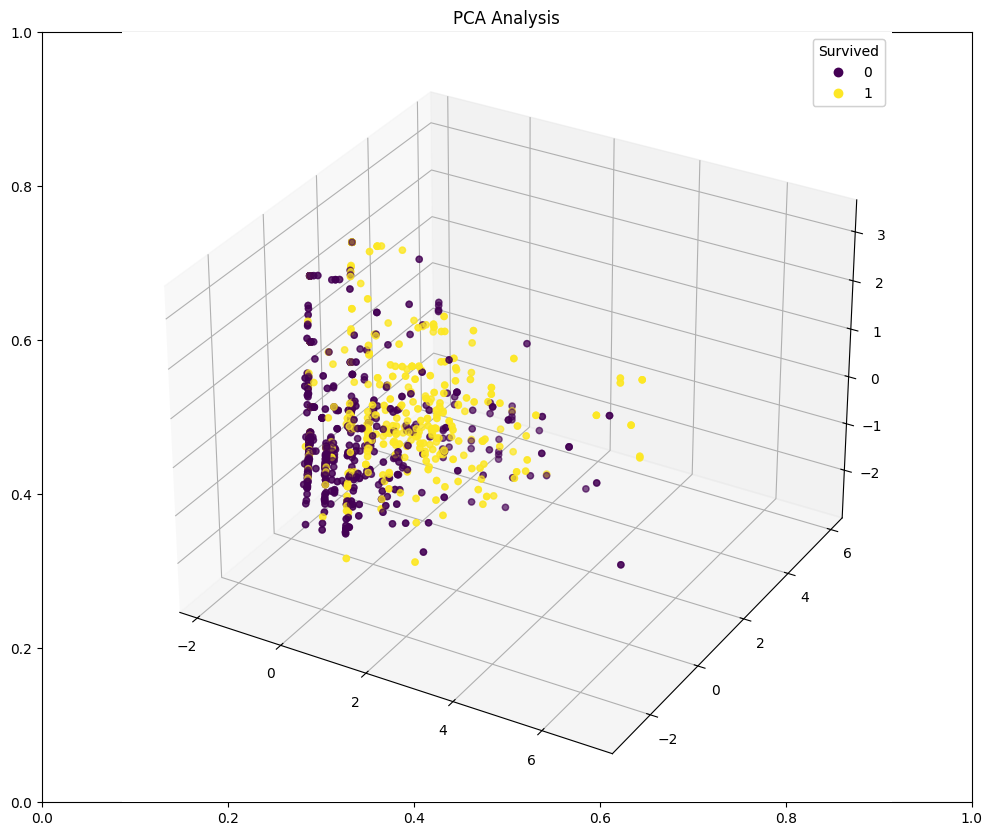

In [27]:
X_pca = df.drop(['PassengerId', 'Survived'], axis=1)
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)

pca = PCA(n_components=3)
pca.fit(X_pca)

print(f"Explained variance: {pca.explained_variance_ratio_}")
print(f"Explained variance: {pca.explained_variance_ratio_.sum()}")
X_pca = pca.transform(X_pca)

# Plot the PCA in a 3D plot with colors for the survivors
fig = plt.figure(figsize=(12, 10))
plt.title('PCA Analysis')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Survived'])
# add a legend
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Survived'])
legend1 = ax.legend(*scatter.legend_elements(), title="Survived")
ax.add_artist(legend1)

plt.show()

#### Normalizing
Thats good for linear models but not for random forest so we got rid of that part

In [66]:
# normalize the data to have values between 0 and 1
# divide each column by the standart deviation of that column

# standard_deviation = df[df.columns[2:]].std()
# standard_deviation

Sex          0.477990
Age         17.597344
SibSp        1.102743
Parch        0.806057
Fare        49.693429
class        0.836071
Embarked     0.638707
dtype: float64

In [67]:
#df[df.columns[2:]] = df[df.columns[2:]] / standard_deviation
df.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,class,Embarked
0,1,0,2.092094,1.250189,0.906829,0.0,0.145895,3.588211,1.565662
1,2,1,0.000000,2.159417,0.906829,0.0,1.434461,1.196070,3.131324
2,3,1,0.000000,1.477496,0.000000,0.0,0.159478,3.588211,1.565662
3,4,1,0.000000,1.988937,0.906829,0.0,1.068552,1.196070,1.565662
4,5,0,2.092094,1.988937,0.000000,0.0,0.161993,3.588211,1.565662


## Decision Trees

Decision trees helps making decisions using variables to classify content.<br>

Basically a tree is a list of arbitrary exigences. If you do respect it you continue on the rigth of the node, if you dont you continue on the left of it. It then helps you classify a content based on a number of parameters. Th emore complex the tree is the more parameters it will use and the more depth it will habe. But **be carefull not to make your trees overfit !** (or else you'll have to chopp them a bit) <br>

An example of a decition tree is You whand to find out which thype of annimal there is in front of you. Then you can have the following thougth process:
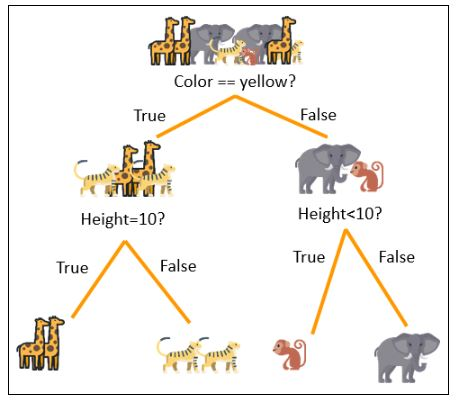<br>
Well this is a **decision tree** it leads you to classify annimals based on a number of features. At each node you see if the value of that annimal regarding a particular feature is above or below a certain threshold. Then you continue the tree untill you've narrowed it down enougth to make a decision.


Now here is an example of what a decision tree can look like with more abstract data:
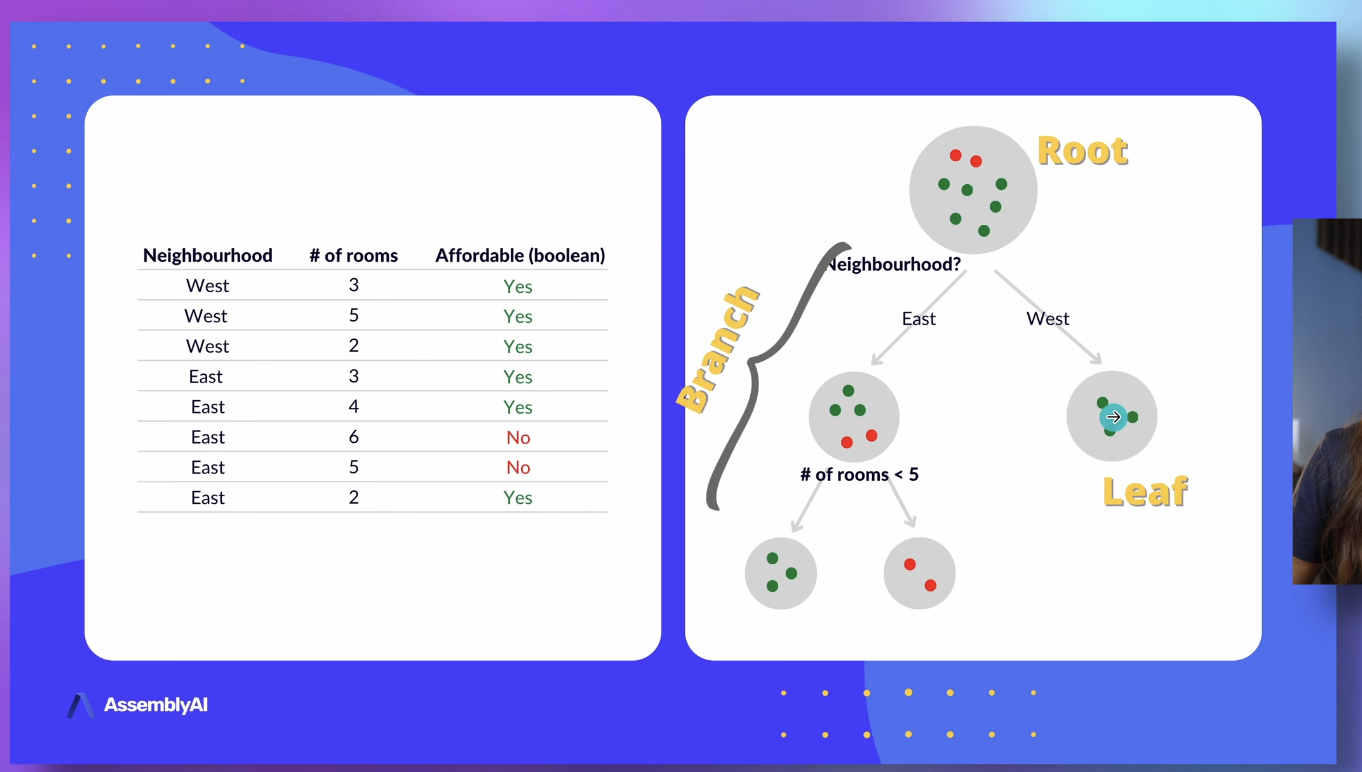
To create a decision tree we start from the top of it and continue creating nodes untill we've splitted the data perfectly or we've reach a predetermines _maximum depth_. Basically at each node we are trying to find the feature and threshold that maximizes the split between my different classes. To do so for each node we compute the Information gain of each feature and chose the one that brings the mose information to the tree.<br>

*Important formulas*:
* Information gain : $$IG = \mathbb{E}(parent)-[weighted \ average]-\mathbb{E}(children)$$

* Entropy $$ \mathbb{E} = - \sum{p(X)*log_2(p(X))}$$
    with : $$p(X) = \frac{\#x}{n}$$

* Stopping criteria: maximum depth, minimum number of samples, min impurity decrease

## Lets create a class for nodes and trees

To create a tree of nodes. We first find the feature and threashold that splits the best our dataset by calculating each possible Information gains. Then we make a node with that information and then continue the tree with the left and rigth side of that node. By continuing the tree we work with (all the other features that hasnt beed used yet. ) a random selection of features every time to improve efficiency and the possibility of having different features. 
$$$$
This goes on untill all the nodes are leaf nodes (leading to a perfect split without hesitation) or if the maximum depth of the tree is reached.

In [48]:
import numpy as np
from collections import Counter

In [49]:
# Nodes are the base of decision trees, it is where given a feature and a threshold we decide if we go left or right
# If we reach a leaf node we return the value of that node (the most common value of the labels)
class Node:
    def __init__(self,
                 feature = None,
                 threshold = None,
                 left = None,
                 rigth = None,
                 *, # only keyword arguments after this
                 value = None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.rigth = rigth
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None

# The decision tree combines the nodes to create a tree that can be used to make predictions
# The tree is grown recursively by splitting the data in two parts and creating a node for each split
# The best split is the one that maximizes the information gain
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None
    
    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(self.n_features, X.shape[1])
        self.root = self._grow_tree(X, y) 
        pass
    
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        # Check the stopping criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        
        feat_idxs = np.random.choice(n_features, self.n_features, replace=False)
        
        # find the best split
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        
        # Ensure splits are not empty
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        rigth = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        
        return Node(best_feat, best_thresh, left, rigth)
    
    def _most_common_label(self, y):
        #return np.bincount(y).argmax() #dont tolerate negatiev values
        return Counter(y).most_common(1)[0][0]
    
    def _best_criteria(self, X, y, feat_idxs):
        # Loop through all features and thresholds to find the best split
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh
    
    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = self._entropy(y)
        left_idxs, rigth_idxs = self._split(X_column, split_thresh)
        
        if len(left_idxs) == 0 or len(rigth_idxs) == 0:
            return 0
        
        n = len(y)
        n_l, n_r = len(left_idxs), len(rigth_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[rigth_idxs])
        
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r
        
        return parent_entropy - child_entropy
    
    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])
    
    def _split(self, X, split_thresh):
        left_idxs = np.argwhere(X <= split_thresh).flatten()
        rigth_idxs = np.argwhere(X > split_thresh).flatten()
        return left_idxs, rigth_idxs
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.rigth)

In [50]:
def display_Tree(node, depth=0):
    if node is None:
        return
    if node.is_leaf_node():
        print(f"{depth*'  '}Leaf Node: {node.value}")
        return
    print(f"{depth*'  '}Feature: {node.feature}, Threshold: {node.threshold}")
    display_Tree(node.left, depth+1)
    display_Tree(node.rigth, depth+1)

## Example of application

### Lets import our dataset

In [71]:
import pandas as pd

In [72]:
#df = pd.read_csv('data/titanic_cleaned.csv')
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,class,Embarked
0,1,0,2.092094,1.250189,0.906829,0.0,0.145895,3.588211,1.565662
1,2,1,0.000000,2.159417,0.906829,0.0,1.434461,1.196070,3.131324
2,3,1,0.000000,1.477496,0.000000,0.0,0.159478,3.588211,1.565662
3,4,1,0.000000,1.988937,0.906829,0.0,1.068552,1.196070,1.565662
4,5,0,2.092094,1.988937,0.000000,0.0,0.161993,3.588211,1.565662


In [73]:
y = df[["PassengerId", 'Survived']]
X = df.drop('Survived', axis=1)
y.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [74]:
X.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,class,Embarked
0,1,2.092094,1.250189,0.906829,0.0,0.145895,3.588211,1.565662
1,2,0.000000,2.159417,0.906829,0.0,1.434461,1.196070,3.131324
2,3,0.000000,1.477496,0.000000,0.0,0.159478,3.588211,1.565662
3,4,0.000000,1.988937,0.906829,0.0,1.068552,1.196070,1.565662
4,5,2.092094,1.988937,0.000000,0.0,0.161993,3.588211,1.565662


lets take the first 10 rows and make a decision tree

In [75]:
import matplotlib.pyplot as plt

In [76]:
X[:5].values[:, 1:].shape

(5, 7)

In [77]:
X_train, y_train = X[:5].values[:, 1:], y[:5].values[:, 1].flatten()

In [78]:
X_train.shape, y_train

((5, 7), array([0, 1, 1, 1, 0]))

Now lets create the decition tree

In [79]:
tree = DecisionTree(max_depth=5, n_features=2)
tree.fit(X_train, y_train)
display_Tree(tree.root)

Feature: 5, Threshold: 1.1960703239013228
  Leaf Node: 1
  Feature: 2, Threshold: 0.0
    Leaf Node: 1
    Leaf Node: 0


In [80]:
predictions = tree.predict(X_train)
predictions

array([0, 1, 1, 1, 1])

In [81]:
print(f"Accuracy: {np.mean(predictions == y_train) * 100:.2f}%")

Accuracy: 80.00%


## Random Forest

A tree is good but it has its limits, for a large or complex dataset one tree is too concrete to be able to generalise. Thats why we created the **Random Tree Forest**

<br>
The concept is simple:<br>
   - You create a lot of different trees <br>
   -  To make a decision you get the outputs out of each tree and the majority wins.<br>
   - For eample with a random forest of 100 trees and a dataset consisting of finding the survivors of the titanic given their Class, age ...
        If for a given passenger i have 55 'survived' and '45' dies. I will say that the passenger is likely to survive. (We can eather output 0 or 1 or the confidence score, here being 0.55)<br>
<br>

To ensure that each tree uses different features and splits the data using different techniques we use randomization twice. Thats why it is called a **random**  tree forest.<br>
   1) We split the dataset into smaller ones<br>
   2) when creating a tree we use a randomely selected number of features to ensure diversity.<br>
<br>

Hyperparameters are:<br>
   - The depth of the trees<br>
   - The number of trees<br>
   - The number of features allowed by tree<br>
<br>

Usually numbers such as the _square root_ or the _log_ of the number of features tends to work well for both efficiency and reliability.
<br>

**Notes**:
   - By taking the _mean_ of the outputs we can also solve regression problems using random forests

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Sex          891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   class        891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 62.8 KB


In [52]:
class RandomForest:
    def __init__(self, n_trees=100, min_samples_split=2, max_depth=100, n_features=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.trees = []
        
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split, max_depth=self.max_depth, n_features=self.n_features)
            X_samp, y_samp = self._bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)
        
    def predict(self, X, choiceMethod='majority'):
        dictMethod = {
            'majority': self._most_common_label,
            'average': np.mean
        }
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [dictMethod[choiceMethod](tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)
    
    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]
    
    def _most_common_label(self, y):
        return Counter(y).most_common(1)[0][0]
    

### Now lets try it out

In [84]:
np.log(X.shape[1])

2.0794415416798357

In [85]:
forest = RandomForest(n_trees=60, max_depth=10, n_features=2)

# shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop(['Survived', "PassengerId"], axis=1).values
y = df['Survived'].values.flatten()

trainPercent = 0.8
trainSize = int(trainPercent * len(X))

X_train, y_train, X_test, y_test = X[:trainSize], y[:trainSize], X[trainSize:], y[trainSize:]

forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
print(predictions)
print(f"Accuracy: {np.mean(predictions == y_test) * 100:.2f}%")

[0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1]
Accuracy: 78.21%


## Optimization phase 

It is hard to know which hyperparameters to chose, to do so we'll make a training loop that will compare different sizes for the random parameters.

In [86]:
from tqdm import tqdm

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

### 1st Method: The itterative training loop
We iterate throutgh all he possibilities of a feature, chose the best, then change feature and come back to the first feature until the number of epoxhs is reached.


In [88]:
best_hyperparameters = {
    'n_trees': 60,
    'max_depth': 10,
    'n_features': 2
}
best_accuracy = 0

current_hyperparameters = {
    'n_trees': 35,
    'max_depth': 10,
    'n_features': 2
}

to_try = {
    'n_trees': {
        'min': 10,
        'max': 128,
        'step': 5
    },
    'max_depth': {
        'min': 1,
        'max': 32,
        'step': 2
    },
    'n_features': {
        'min': 1,
        'max': X.shape[1]-1,
        'step': 1
    }
}

Training stopped


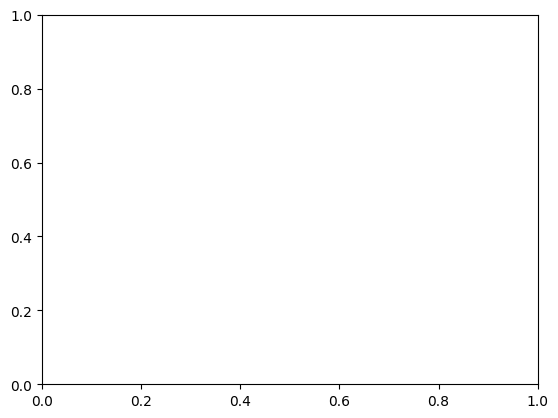

In [89]:
NUMBER_OF_TRIES = 10    # To have an accurate accurency we look for an average of the accuracy over 10 tries
epochs = 10
store = {}

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ans = ''

    
for epoch in range(epochs):
    if epoch <= 0:
        while not(ans.lower() in ('y', 'n')):
            ans = input("Do you want to continue the training? (y/n): ")

        if ans.lower() == 'n':
            print("Training stopped")
            break

    for feature in to_try:
        
        # Check if the store has all the requiered sub dictionnaries and lists
        if not(epoch in store):
                store[epoch] = {}
        if not(feature in store[epoch]):
            store[epoch][feature] = {}
        if not('x' in store[epoch][feature]):
            store[epoch][feature]['x'] = []
        if not('accuracy' in store[epoch][feature]):
                store[epoch][feature]['accuracy'] = []
        
        # Loop over the values to try
        for x in range(to_try[feature]['min'], to_try[feature]['max']+1, to_try[feature]['step']):
            accuracy = 0
            current_hyperparameters[feature] = x
            for _ in range(NUMBER_OF_TRIES):
                forest = RandomForest(**current_hyperparameters)
                forest.fit(X_train, y_train)
                predictions = forest.predict(X_test)
                accuracy += np.mean(predictions == y_test)
                
            accuracy /= NUMBER_OF_TRIES
            if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_hyperparameters[feature] = x
            
            store[epoch][feature]['x'].append(x)
            store[epoch][feature]['accuracy'].append(accuracy)
            # ax.set_xlim(0, i)
            # fig.clear()
            ax.cla()
            fig.suptitle(f"Epoch {epoch} | Feature {feature}")
            ax.plot(store[epoch][feature]['x'], store[epoch][feature]['accuracy'])
            display(fig)
            # save the figure
            clear_output(wait = True)
        fig.savefig(f"img/epoch_{epoch}_feature_{feature}.png")
        print(f"    - Feature: {feature}, Value: {best_hyperparameters[feature]}, Accuracy: {best_accuracy}")
        current_hyperparameters = best_hyperparameters.copy()
    print(f"Epoch {epoch} done, best accuracy : {best_accuracy}, best hyperparameters: {best_hyperparameters}")

### 2nd method : The genetic algorithm
The genetic algorithm takes profit of natural behaviors. It muttates the best agents during each epochs and keeps the ones performing the better.

In [90]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [91]:
import datetime
import os

In [103]:
def flavourAgent(agent, featuresBorns) -> tuple:
    featureToChange = random.choice(range(len(featuresBorns)))
    newAgent = list(agent)
    newAgent[featureToChange] = min(max(int(agent[featureToChange]+random.uniform(-2, 2)), featuresBorns[featureToChange][0]), featuresBorns[featureToChange][1])
    return tuple(newAgent)

def randomAgent(featuresBorns) -> tuple:
    return tuple([random.randint(featuresBorns[i][0], featuresBorns[i][1]) for i in range(len(featuresBorns))])

In [105]:
# Hyperparameters storage : tuple[n_trees, max_depth, n_features]
# there are two list, a list of hyperparameters and a list of accuracy. The index of the hyperparameters corresponds to the index of the accuracy

percentage_kept = 0.2
percentage_random = 0.05
number_agents = 30
to_try = {
    'n_trees': {
        'min': 10,
        'max': 128,
    },
    'max_depth': {
        'min': 1,
        'max': 32,
    },
    'n_features': {
        'min': 1,
        'max': 7,
    }
}

# generate the first agents with random hyperparameters
featureOrder = ('n_trees', 'max_depth', 'n_features')
featuresBorns = tuple([(to_try[feature]['min'], to_try[feature]['max']) for feature in featureOrder])
epochs = 10

repetitionsForMean = 1
saveRun = True


In [114]:
import json

30 x 1 computations:   0%|          | 0/30 [00:01<?, ?it/s]


Best agens: [(120, 6, 6), (70, 16, 7), (23, 8, 7)]
pivot : 2.5 | meanAgents : 3 | reminder : 5 | nbAgentsToGenerate : 23 | len(agents) : 7 | nbAgentsToKeep : 6
Best agens: [(120, 6, 6), (70, 16, 7), (23, 8, 7)]
Epoch 0 done | best accuracy : 0.80 | mean accuracy : 0.78


30 x 1 computations: 100%|██████████| 30/30 [02:24<00:00,  5.03s/it]

Best agens: [(23, 8, 7), (119, 6, 6), (70, 16, 7)]
pivot : 2.5 | meanAgents : 3 | reminder : 5 | nbAgentsToGenerate : 23 | len(agents) : 7 | nbAgentsToKeep : 6
Best agens: [(23, 8, 7), (119, 6, 6), (70, 16, 7)]
Epoch 1 done | best accuracy : 0.82 | mean accuracy : 0.79


30 x 1 computations: 100%|██████████| 30/30 [02:24<00:00,  4.83s/it]


KeyboardInterrupt: 

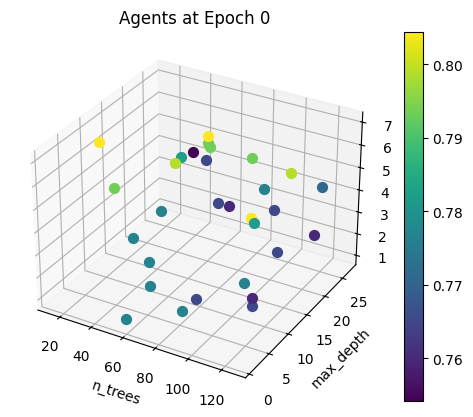

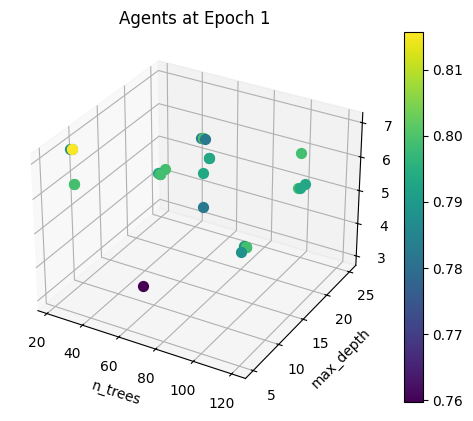

In [113]:
agents = [randomAgent(featuresBorns) for _ in range(number_agents)]

nbAgentsToKeep = int(percentage_kept * len(agents))
nbRandomAgents = int(percentage_random * len(agents))

if saveRun:
    # make a directory with the date and time
    now = datetime.datetime.now()
    directory = now.strftime("%Y-%m-%d_%H-%M-%S")
    os.mkdir(f"history/{directory}")

# train the agents
for epoch in range(epochs):
    accuracy = np.zeros(len(agents))
    tqdmBar = tqdm(agents, desc=f"{len(agents)} x {repetitionsForMean} computations", total=len(agents)*repetitionsForMean)
    for i, agent in enumerate(agents):
        for _ in range(repetitionsForMean):
            forest = RandomForest(*agent)
            forest.fit(X_train, y_train)
            predictions = forest.predict(X_test)
            accuracy[i] += np.mean(predictions == y_test)
            tqdmBar.update(1)
        accuracy[i] /= repetitionsForMean
    
    #print(f"Generating the plot...")
    if saveRun and epoch % 1 == 0:  # Adjust the condition to control plotting frequency
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # Normalize accuracy for colormap
        norm = plt.Normalize(accuracy.min(), accuracy.max())
        colors = cm.viridis(norm(accuracy))
        
        for agent, color in zip(agents, colors):
            ax.scatter(agent[0], agent[1], agent[2], color=color, s=50)
            
        # Add a colorbar
        sm = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
        sm.set_array([])
        fig.colorbar(sm, ax=ax)
        
        ax.set_xlabel(featureOrder[0])
        ax.set_ylabel(featureOrder[1])
        ax.set_zlabel(featureOrder[2])
        ax.set_title(f'Agents at Epoch {epoch}')
        plt.savefig(f"history/{directory}/epoch_{epoch}.png")
        
    if (epoch >= epochs -1):
        break
    
    #print(f"Keeping the best ones")
    # Finf the 3rd indexes in accuracy that are the best
    
    best_idx = np.argsort(accuracy)[-nbAgentsToKeep:][::-1].astype(int)
    
    # keep only the best agents
    agents = [agents[i] for i in best_idx] + [randomAgent(featuresBorns) for _ in range(nbRandomAgents)]
    nbAgentsToGenerate = number_agents - len(agents)
    
    # get the reminder of a //b
    reminder = nbAgentsToGenerate % (len(agents)-1)
    meanAgents = nbAgentsToGenerate // (len(agents)-1)
    
    pivot = (nbAgentsToKeep-1) / 2
    
    #print(f"Generating new agents...")
    for a in range(nbAgentsToKeep):
        
        # The best agents are kept and new agents are generated by mixing the best agents
        agents.extend([flavourAgent(agents[a], featuresBorns) for _ in range(int(meanAgents+(int(pivot-a))))])
        
        if reminder > 0:
            # if there is a reminder we add one more agent (starting from the best agent)
            agents.append(flavourAgent(agents[a], featuresBorns))
            reminder -= 1
    
    print(f"Epoch {epoch} done | best accuracy : {max(accuracy):.2f} | mean accuracy : {np.mean(accuracy):.2f}")

# save the best agents in order of accuracy in a json file
best_idx = np.argsort(accuracy)[::-1].astype(int)
best_agents = [agents[i] for i in best_idx]
to_save = [{'hyperparameters': agent, 'accuracy': accuracy[i]} for i, agent in enumerate(best_agents)]
os.mkdir(f"models/{directory}")
json.dump(to_save, open(f"models/{directory}/best_agents.json", 'w'))

## Benchmark
Lets compare random forest with random choice and linear regression

### Linear Regression with PCA

In [77]:
df = pd.read_csv('data/titanic_cleaned.csv')

In [78]:
df['class'] = df['1st_class'] + df['2nd_class'] * 2 + df['3rd_class'] * 3
df.drop(['1st_class', '2nd_class', '3rd_class'], axis=1, inplace=True)
df["Embarked"] = df["Embarked_S"] + df["Embarked_C"] * 2 + df["Embarked_Q"] * 3
df.drop(['Embarked_S', 'Embarked_C', 'Embarked_Q'], axis=1, inplace=True)

X_pca = df.drop(['PassengerId', 'Survived'], axis=1)
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)

pca = PCA(n_components=3)
pca.fit(X_pca)

X_pca = pca.transform(X_pca)

In [79]:
# train a linear regression model on X_pca
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Survived'], test_size=0.2, random_state=42)

modelPCA = LogisticRegression()
modelPCA.fit(X_train, y_train)
predictions = modelPCA.predict(X_test)
accuracyPCA = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracyPCA * 100:.2f}%")

Accuracy: 74.30%


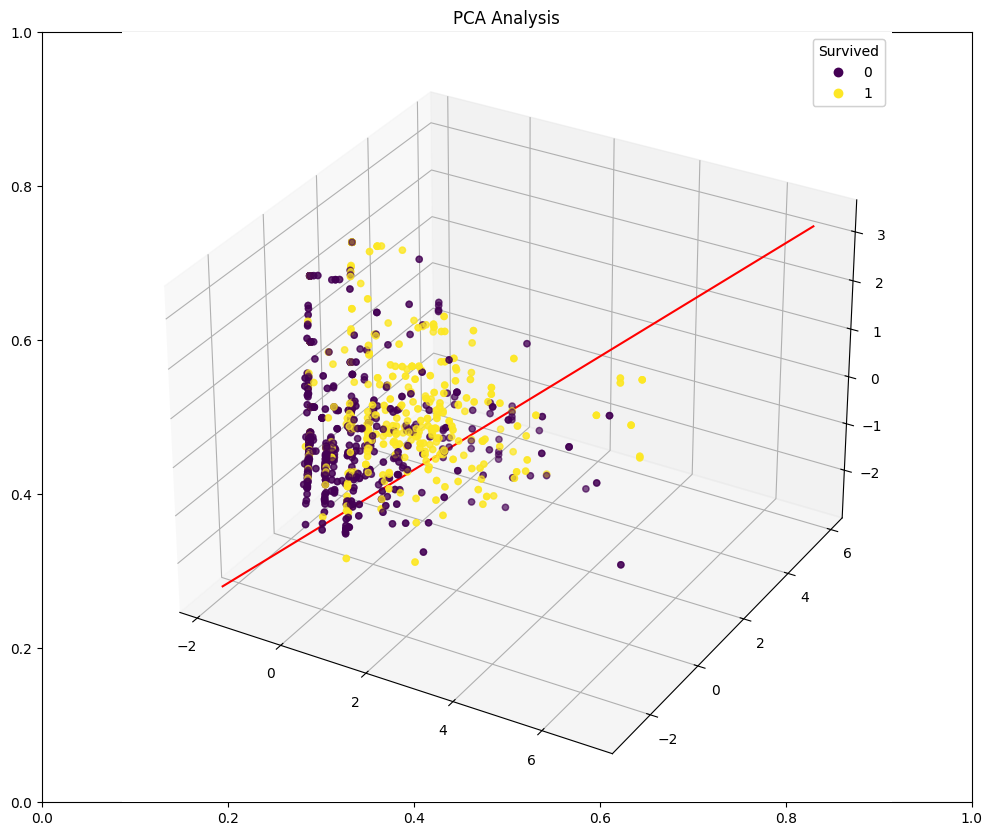

In [87]:
# Plot the PCA in a 3D plot with colors for the survivors and the linear regression line in red
fig = plt.figure(figsize=(12, 10))
plt.title('PCA Analysis')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Survived'])
# add a legend
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Survived'])
legend1 = ax.legend(*scatter.legend_elements(), title="Survived")
ax.add_artist(legend1)

# Find endpoints for the regression line
x_endpoints = [X_pca[:, 0].min(), X_pca[:, 0].max()]
y_endpoints = [X_pca[:, 1].min(), X_pca[:, 1].max()]
z_endpoints = [X_pca[:, 2].min(), X_pca[:, 2].max()]

# Plot the regression line
ax.plot(x_endpoints, y_endpoints, z_endpoints, color='red')

plt.show()

### Linear regretion with normalization

In [62]:
df = pd.read_csv('data/titanic_cleaned.csv')

In [63]:
# normalize the data to have values between 0 and 1
# divide each column by the standart deviation of that column

standard_deviation = df[df.columns[2:]].std()
standard_deviation

Sex            0.477990
Age           17.597344
SibSp          1.102743
Parch          0.806057
Fare          49.693429
1st_class      0.428790
2nd_class      0.405028
3rd_class      0.497665
Embarked_S     0.447876
Embarked_C     0.391372
Embarked_Q     0.281141
dtype: float64

In [64]:
df[df.columns[2:]] = df[df.columns[2:]] / standard_deviation
df.head(3)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,1st_class,2nd_class,3rd_class,Embarked_S,Embarked_C,Embarked_Q
0,1,0,2.092094,1.250189,0.906829,0.0,0.145895,0.000000,0.0,2.009385,2.232762,0.000000,0.0
1,2,1,0.000000,2.159417,0.906829,0.0,1.434461,2.332143,0.0,0.000000,0.000000,2.555113,0.0
2,3,1,0.000000,1.477496,0.000000,0.0,0.159478,0.000000,0.0,2.009385,2.232762,0.000000,0.0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['PassengerId', 'Survived'], axis=1), df['Survived'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracyNorm = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracyNorm * 100:.2f}%")

Accuracy: 77.65%


### Random Selection

In [66]:
df = pd.read_csv('data/titanic_cleaned.csv')

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['PassengerId', 'Survived'], axis=1), df['Survived'], test_size=0.2, random_state=42)
predictions = np.random.randint(0, 2, len(y_test))
accuracyRand = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracyRand * 100:.2f}%")

Accuracy: 53.07%


### Ploting the differences

In [68]:
import json

In [69]:
df = pd.read_csv('data/titanic_cleaned.csv')
df['class'] = df['1st_class'] + df['2nd_class'] * 2 + df['3rd_class'] * 3
df.drop(['1st_class', '2nd_class', '3rd_class'], axis=1, inplace=True)
df["Embarked"] = df["Embarked_S"] + df["Embarked_C"] * 2 + df["Embarked_Q"] * 3
df.drop(['Embarked_S', 'Embarked_C', 'Embarked_Q'], axis=1, inplace=True)

In [70]:
# Select the best accuracy from a given json file
jsonFile = 'models/2024-05-22_20-31-42/best_agents.json'
best_agents = json.load(open(jsonFile, 'r'))
best_agent = max(best_agents, key=lambda x: x['accuracy'])
best_agent

{'hyperparameters': [56, 10, 7], 'accuracy': 0.8044692737430168}

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['PassengerId', 'Survived'], axis=1), df['Survived'], test_size=0.2, random_state=42)
X_train, X_test = X_train.values, X_test.values
y_train, y_test = y_train.values, y_test.values
# train a random forest model on the original data
forest = RandomForest(*best_agent['hyperparameters'])
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
accuracyOriginal = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracyOriginal * 100:.2f}%")

Accuracy: 82.12%


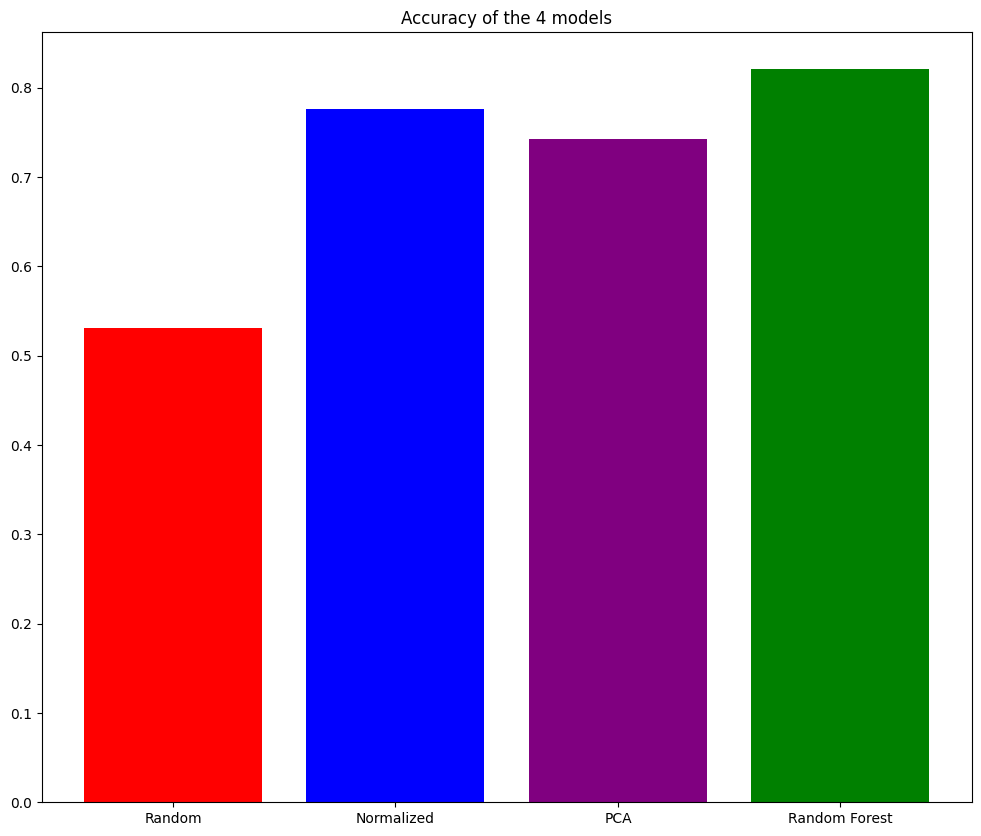

In [75]:
# plot the accuracies of the 4 models
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
plt.title('Accuracy of the 4 models')
ax.bar(['Random', 'Normalized', 'PCA', 'Random Forest'], [accuracyRand, accuracyNorm, accuracyPCA, accuracyOriginal], color=['red', 'blue', 'purple', 'green'])
# Explicityly display the accuracy on top of the bars
for i, v in enumerate([accuracyRand, accuracyNorm, accuracyPCA, accuracyOriginal]):
    ax.text(i, v, f"{v*100:.2f}%", ha='center', va='bottom')

plt.show()